# EA Assignment 05 - Topic Modelling
__Authored by: Álvaro Bartolomé del Canto (alvarobartt @ GitHub)__

---

<img src="https://media-exp1.licdn.com/dms/image/C561BAQFjp6F5hjzDhg/company-background_10000/0?e=2159024400&v=beta&t=OfpXJFCHCqdhcTu7Ud-lediwihm0cANad1Kc_8JcMpA">

We will start this Jupyter Notebook with a little recap from the previous one named `02 - Data Preprocessing.ipynb` where we defined the NLP Preprocessing pipeline we want to apply in order to prepare the input raw text into valuable text, at the end of that Jupyter Notebook we dumped the generated `pandas.DataFrame` into a JSON-Lines file so as to avoid preprocessing the data on each Notebook. So on, this Jupyter Notebook starts with the preprocessed data loading, which means that if you want to have more details/insights on how the data is being preprocessed just refer to the previous notebook.

## Loading PreProcessed Data

__Reproducibility Warning__: you will not find the `PreProcessedDocuments.jsonl` file when cloning the repository from GitHub, since it has been included in the .gitignore file due to the GitHub quotas when uploading big files. So on, if you want to reproduce this Jupyter Notebook, please refer to `02 - Data Preprocessing.ipynb` where the NLP preprocessing pipeline is explained and this file is generated.

In [1]:
import json

data = list()

with open('PreProcessedDocuments.jsonl', 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [2]:
import pandas as pd

data = pd.DataFrame(data)
data.head()

,lang,context,preprocessed_text
0,en,wikipedia,watchmen twelve issue comic book limited serie...
1,en,wikipedia,citigroup center formerly citicorp center one ...
2,en,wikipedia,birth_place death_date death_place party conse...
3,en,wikipedia,marbod maroboduus born bc died king marcomanni...
4,en,wikipedia,sylvester medal bronze medal awarded every thr...


In [3]:
data.shape

(23011, 3)

In [4]:
data = data[(data['lang'] == 'en') & (data['context'] == 'wikipedia')]
data.shape

(4000, 3)

We will also remove the words/tokens with 2 characters or less, since they do not provide any useful information towards the Topic Modelling model.

In [6]:
texts = list()

for index, row in data.iterrows():
    texts.append([word for word in row['preprocessed_text'].split(' ') if len(word) > 2])

---

## Tackling the Topic Modelling

So as to tackle this problem, we will just create a Topic Modelling model for each unique combination of 'context' and 'language', since without a proper Machine Translation model to translate/unify all the text in the dataset to English. It is useless to apply the same Topic Modelling model to data written in different languages since there will no be relation even though between texts of the same topic in the same context.

For example, a couple of Wikipedia's texts of the topic "Historical Events" written in English and French will no have any common words/tokens except the non-specific language words such as names, surnames, etc.

So on, we will be testing some commonly used Topic Modelling algorithms splitting the data by context and language in order to get to know both the number of suitable topics from the main words of each topic and then visualize them in a 2D plot.

---

## Text Clustering with KMeans

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
X = vect.fit_transform(data['preprocessed_text'].values)

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

vis = KElbowVisualizer(KMeans(), k=(2,20))

/home/alvaro/anaconda3/envs/ea/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

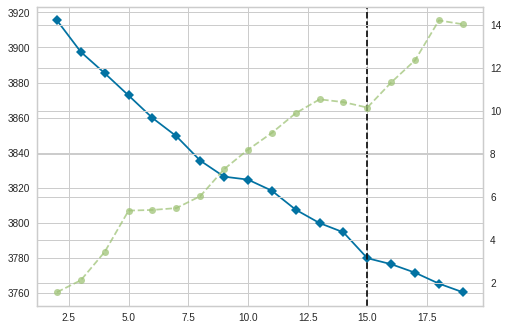

In [31]:
vis.fit(X)

---

## Topic Modelling with LDA

Latent Dirichlet Allocation ...


__Note__: since we are just testing the most common Topic Modelling algorithms, we will be using just the Wikipedia texts written in English. 

In [47]:
import gensim

In [48]:
id2word = gensim.corpora.Dictionary(texts)
list(id2word.token2id.items())[:5]

[('abandon', 0),
 ('abbreviated', 1),
 ('abc', 2),
 ('abilities', 3),
 ('ability', 4)]

In [49]:
id2word.filter_extremes(no_below=10, no_above=0.05)

In [50]:
corpus = [
    id2word.doc2bow(document=text, allow_update=True) for text in texts
]

In [51]:
%time lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=5)

CPU times: user 2min 11s, sys: 4min 26s, total: 6min 38s
Wall time: 49 s


In [52]:
from pprint import pprint
pprint(lda.print_topics(num_words=5))

[(0,
  '0.008*"category" + 0.006*"world" + 0.005*"first" + 0.005*"cup" + '
  '0.004*"team"'),
 (1,
  '0.004*"also" + 0.004*"city" + 0.004*"war" + 0.004*"category" + 0.003*"one"'),
 (2, '0.004*"also" + 0.004*"used" + 0.004*"may" + 0.003*"one" + 0.003*"water"'),
 (3,
  '0.007*"category" + 0.005*"new" + 0.005*"also" + 0.004*"first" + '
  '0.004*"one"'),
 (4, '0.004*"also" + 0.004*"used" + 0.003*"one" + 0.003*"new" + 0.003*"use"')]


In [53]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [54]:
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.030760 -0.073274       1        1  29.836756
3     -0.076390 -0.038430       2        1  28.705904
2      0.158234  0.063580       3        1  16.329360
4      0.071382 -0.048267       4        1  14.544461
0     -0.122467  0.096391       5        1  10.583518, topic_info=           Term          Freq         Total Category  logprob  loglift
21279     album   4492.000000   4492.000000  Default  30.0000  30.0000
23573       cup   2571.000000   2571.000000  Default  29.0000  29.0000
23809      team   3813.000000   3813.000000  Default  28.0000  28.0000
21440  category  20698.000000  20698.000000  Default  27.0000  27.0000
21754      film   4990.000000   4990.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
21289      also   1548.745506  18539.562635   Topic5  -5.7220  -0.2366
22961      year    993.525681   5826.617428   Topic5  -6.1660   0.4769
22584      time   1075.648667   9140.025078   Topic5  -6.0866   0.1061
22404    second    954.774116   4727.046136   Topic5  -6.2058   0.6463
22740     years    880.220353   6757.424810   Topic5  -6.2871   0.2076

[536 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
13214      2  0.991435  abba
13214      5  0.003699  abba
3828       1  0.008560  acid
3828       2  0.078751  acid
3828       3  0.895366  acid
...      ...       ...   ...
22742      1  0.205719  york
22742      2  0.630756  york
22742      3  0.045715  york
22742      4  0.080436  york
22742      5  0.037614  york

[1614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])